# Reparto
##### Curso: Fundamentos de Macroeconomía (0651)
##### Nombre: Sebastián Daniel Gómez Farje
##### Código: 20200901
##### Fecha: 6/11/2022

## Parte 1: Reporte de Lectura

En su artículo ‘The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment’, Raj Chetty, Nathaniel Hendren y Lawrence Katz profundizan los estudios acerca del impacto que mudarse a barrios con menor pobreza puede tener en indicadores de ingresos futuros. Los autores ahondan en esta investigación porque centran su estudio en personas que se mudaron a áreas con menor pobreza durante su niñez y cómo los efectos en los ingresos a largo plazo están directamente relacionados con cuán jóvenes estas personas eran al momento de la mudanza. A continuación, se presentará el artículo, sus propuestas y la contribución al área de estudio.

La pregunta de investigación del tradicional experimento ‘Moving to Opportunity Experiment’ sería la siguiente: ¿Mudarse a barrios con menor índices de pobreza afecta los ingresos futuros? No obstante, la pregunta de investigación para el particular experimento que los autores plantean en el artículo sería la siguiente: ¿Mudarse a barrios con menores índices de pobreza durante la niñez tiene efectos en los ingresos futuros? Para ello, se condujo un experimento en 4604 familias divididas en 3 grupos: aquellas a quienes se le ofrecieron cheques para mudarse a zonas con menos de 10% de pobreza, aquellas a quienes se les ofreció un cheque para mudarse sin ninguna otra condición y el grupo de control, a quienes no se les ofreció cheque. En el artículo, primero se explica cómo procedió el experimento, posteriormente muestra los resultados y, por último, se compara los nuevos hallazgos con el experimento tradicional (sin el enfoque en mudanzas durante la niñes).

El artículo presenta tanto fortalezas como debilidades. En cuanto a la data, se destaca la cantidad de indicadores utilizados para medir los resultados, lo cual provee al estudio de información contundente para medir el efecto de la mudanza, no solo en términos de ingresos netos. También, como es el artículo es uno que ahonda acerca de un estudio previo, la comparación de resultados es muy benéfica y enriquece el área de estudio. Por otro lado, la data presenta algunos inconvenientes para llegar a conclusiones definitivas. Por ejemplo, los autores mencionan que no se puede determinar que el ser expuestos a mejores barrios tiene un efecto causal en indicadores futuros de los niños porque, como en el experimento las edades de los niños al momento de la mudanza corresponden con un número de años de ser expuestos respectivamente, no se tiene en consideración cómo la variable de “tiempo de exposición” pueda afectar la variable de “edad al tiempo de la mudanza”. Es decir, el experimento no presenta casos en que pueda haber una disyuntiva grande entre estas dos variables como para comprobar que verdaderamente es la edad la principal. Similarmente, otra debilidad del estudio es que el tamaño de la data para cada grupo de edad es muy reducido. De hecho, los autores mismos mencionan que, a pesar de que se comprobó la hipótesis de que el beneficio que puede tener la mudanza está directamente relacionado con cuán joven es el individuo al momento de esta, no se llega a determinar una “edad crítica” que indique un límite en la edad en que niños se pueden beneficiar de la mudanza por el tamaño insuficiente de la muestra.

El experimento que presentan los autores está expandiendo un estudio previo y afinando la información obtenida. Se avanza la pregunta de investigación inicial porque se desmienten los estudios anteriores (‘Moving to Opportunity Experiment’) que no hallaban correlación entre mudarse a mejores barrios e índices de ganancia. Con el enfoque en mudanzas durante la niñez, los autores hallan que, a cierta edad, sí hay correlación significativa. Entonces, la contribución sería demostrar la relevancia de la variable “edad al momento de la mudanza” y refutar las conclusiones previas. En ese sentido, otra manera en que el artículo avanza el estudio es reformulando la pregunta de investigación original, enfocándose en la edad, ya que la redirecciona de manera en que se puede seguir indagando en el área de estudio.

Para avanzar la pregunta de investigación, hay diferentes caminos que podrían tomarse. Por un lado, para resolver el problema de la incapacidad del estudio de clasificar la edad como variable causal, se podría realizar otro experimento que busque aislar las variables “edad al momento de la mudanza” y “tiempo de exposición a mejores barrios”. Así, se limpiaría la variable edad, removiendo el componente explicativo no observado que pueda tener la otra variable. Asimismo, para resolver el problema del tamaño reducido de la data, una posible solución sería realizar el mismo experimento a una escala mayor, quizás afinando algo de la metodología a la vez, pero principalmente aumentando el alcance del estudio. Al estos experimentos tomar mucho tiempo en realizar, no existen muchos artículos que hayan indagado más a fondo, el artículo pareciera ser de los últimos del tema. No obstante, el artículo de Chetty, ‘The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment’, publicado posterior al experiment, ahonda en los hallazgos del estudio y presenta un Estado del Arte más actualizado. Por otro lado, podría ser interesante observar el porqué de aceptar o no aceptar los cheques ofrecidos, y analizar por qué las familias del segundo grupo (a quienes se les ofreció cheque, pero sin condiciones adicionales) eligieron los barrios que eligieron (con menos pobreza que los barrios de las familias del grupo de control, pero con mayor pobreza que los barrios de las familias del primer grupo). Un estudio que indaga acerca de este asunto es el de Bergman, Chetty, DeLuca, Hendren, Katz y Palmer: ‘Creating Moves to Opportunity: Experimental Evidence on Barriers to Neighborhood Choice’.


## Parte 2: Código

$Colaboradores:$
- Sebastián Elias Torres Tapia (20201586)
- Sebastián Daniel Gómez Farje (20200901)

In [147]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import pylab as plt

import statistics
from causalgraphicalmodels import CausalGraphicalModel
import os
from statsmodels.iolib.summary2 import summary_col

### Data

In [8]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [9]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


### Histogramas

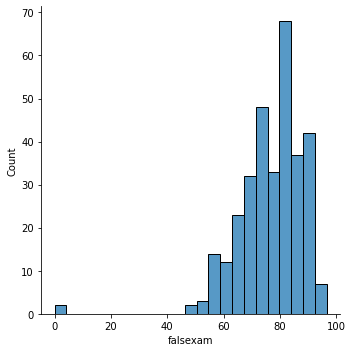

In [32]:
sns.displot(data, x="falsexam")

In [16]:
data = data.assign(format_ol_or_blended = data.format_ol + data.format_blended)
# Variable de utilidad, para aislar en cierto modo qué casos serían Face-to-Face

In [43]:
data = data.assign(format_ftf = (data.format_ol_or_blended - 1)**2)
# Variable dummy nueva para el formato Face-to-Face

In [44]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,format_ol_or_blended,format_ftf
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0.0,1.0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1.0,0.0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,1.0,0.0
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,1.0,0.0
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,1.0,0.0


In [49]:
data = data.assign(valor_ol = data.format_ol*1, valor_blended = data.format_blended*2, valor_ftf = data.format_ftf*3)
# Variables de utilidad como paso previo a crear una variable en donde cada formato tenga asignado un valor 1, 2 o 3, como se explicó en el slack

In [52]:
data = data.assign(format_type = data.valor_ol + data.valor_blended + data.valor_ftf)
# Nueva variable en que cada formato tiene asignado valor 1, 2 o 3, como se explicó en el slack

In [79]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,format_ol_or_blended,format_ftf,valor_ol,valor_blended,valor_ftf,format_type
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0.0,1.0,0,0.0,3.0,3.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0.0,1.0,0,0.0,3.0,3.0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1.0,0.0,0,2.0,0.0,2.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1.0,0.0,0,2.0,0.0,2.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,1.0,0.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1.0,0.0,0,2.0,0.0,2.0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,1.0,0.0,1,0.0,0.0,1.0
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,1.0,0.0,1,0.0,0.0,1.0
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,1.0,0.0,1,0.0,0.0,1.0


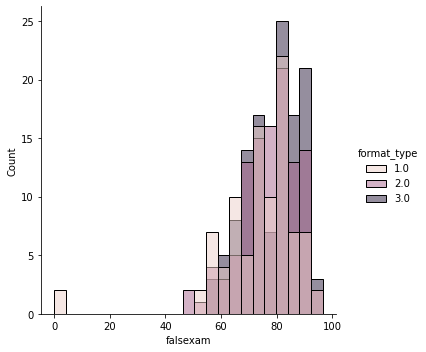

In [55]:
sns.displot(data, x="falsexam", hue="format_type")

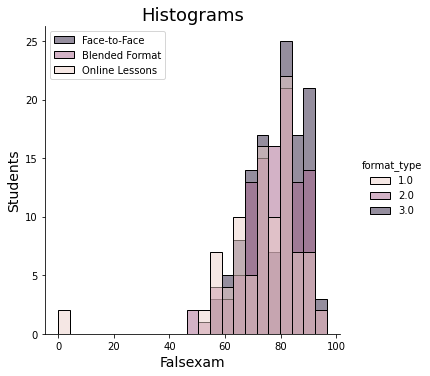

In [69]:
sns.displot(data, x="falsexam", hue="format_type")
labels= ["Face-to-Face","Blended Format", "Online Lessons"]
plt.xlabel("Falsexam", fontsize=14)
plt.ylabel("Students", fontsize=14)
plt.title("Histograms", fontsize=18)
plt.legend(labels)

$Explicación:$

Con los tres histogramas traslapados, se pueden encontrar diferencias entre estos. El formato de clases virtuales pareciera tener una tendencia a valores más bajos de False Exam. Esto se puede observar porque presentan mayor cantidad de casos que los demás formatos en la primera, tercera, cuarta y sexta columna de distribución. Cabe resaltar que la primera columna de distribución, que tiene el valor más bajo, solo esta conformada por alumnos en formato de clases virtuales. El formato mixto pareciera contar con una tendencia ni tan baja ni tan elevada, ya que la única columna de distribución en que tiene más casos que los otros formatos es la novena. Por último, el formato cara a cara pareciera tener una tendencia más elevada, ya que supera por bastante a los otros formatos en la décima, undécima y duodécima columna de distribución, sin mencionar que también cuenta con ligera superioridad en casos en la quinta, séptima, octava y décimo tercera columna. En conclusión, el formato virtual tiene tendencia a menores valores de False Exam, mientras que el formato cara a cara tiene tendencia a mayores valores de esta medida.

### Difference-in-means estimator

In [84]:
DIM = data[['format_type','falsexam']]
# Aislar la columna de tipo de formato y los valores de falsexam

In [85]:
DIM

,format_type,falsexam
0,3.0,63.29997
1,3.0,79.96000
2,2.0,83.37000
3,2.0,90.01994
4,1.0,83.30000
...,...,...
318,2.0,68.36000
319,1.0,70.05000
320,1.0,66.69000
321,1.0,83.29997


In [89]:
separar=[1.0, 3.0]

In [92]:
PRUEBA2 = DIM[DIM['format_type'].isin(separar)]
# Eliminar format_blended porque en el ejercicio solo piden format_ol y format_ftf

In [120]:
PRUEBA2

,format_type,falsexam
0,3.0,63.29997
1,3.0,79.96000
4,1.0,83.30000
5,1.0,88.34996
7,3.0,90.00000
...,...,...
316,3.0,91.65000
317,3.0,84.99000
319,1.0,70.05000
320,1.0,66.69000


In [94]:
PRUEBA2.groupby(["format_type"]).mean()

,falsexam
format_type,
1.0,73.635263
3.0,78.547485


In [95]:
Diference_ol_ftf = 78.547485 - 73.635263

In [96]:
Diference_ol_ftf

4.912222

In [103]:
4.912222/73.635263*100

6.671018476568761

$Interpretación:$

Pareciera que, en promedio, los valores en Falsexam del grupo Face-to-Face son superiores a los del grupo Online Lessons por 4.912222. Entonces, en promedio, el formato Face to Face incrementa el valor de Falsexam en 6.671018476568761% con respecto a los valores en el formato Online Lessons. Así, se podría interpretar que el formato Face to Face es más beneficioso (no estoy seguro qué representa Falsexam, pero asumiré que es algo positivo, ergo el "beneficioso").

### Difference-in-means estimator via linear regression

In [136]:
PRUEBA3 = DIM

In [139]:
print(PRUEBA3.format_type)
for i in range (323):
    if (PRUEBA3.format_type[i]== 3.0):
        PRUEBA3.format_type[i] = 0.0

0      0.0
1      0.0
2      2.0
3      2.0
4      1.0
      ... 
318    2.0
319    1.0
320    1.0
321    1.0
322    2.0
Name: format_type, Length: 323, dtype: float64


In [140]:
PRUEBA3
# Base de datos de utilidad como paso previo a crear la variable dummy solicitada donde format_ol sea 1 y format_ftf sea 0

,format_type,falsexam
0,0.0,63.29997
1,0.0,79.96000
2,2.0,83.37000
3,2.0,90.01994
4,1.0,83.30000
...,...,...
318,2.0,68.36000
319,1.0,70.05000
320,1.0,66.69000
321,1.0,83.29997


In [143]:
separar2 = [0.0, 1.0]

In [144]:
PRUEBA4 = PRUEBA3[PRUEBA3['format_type'].isin(separar2)]

In [145]:
PRUEBA4
# Se elimina format_blended para obtener la variable dummy solicitada donde format_ol sea 1 y format_ftf sea 0

,format_type,falsexam
0,0.0,63.29997
1,0.0,79.96000
4,1.0,83.30000
5,1.0,88.34996
7,0.0,90.00000
...,...,...
316,0.0,91.65000
317,0.0,84.99000
319,1.0,70.05000
320,1.0,66.69000


In [152]:
OLS = sm.OLS.from_formula("falsexam ~ format_type", data = PRUEBA4).fit()

In [153]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        00:07:52   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.5475      1.113     70.563      0.000      76.353      80.742
format_type    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Interpretación:$

Efectivamente, el valor encontrado para beta_1 es el mismo que la diferencia hallada en Difference-in-means estimator: 4.9122. Además de eso, otras asuntos interpretables a partir del summary es que los p-values son menores a 0.05, ergo la variable dummy de ser Online Lessons o Face to Face parece ser significante. No obstante, el R cuadrado es muy reducido, lo cual induciría a suponer que hay muchas más variables en juego para determinar el valor de Falsexam.